In [1]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [2]:
with open('sat1_sspa.txt') as f:
    data = f.readlines()


In [3]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
positive_value = ['ON','TRUE','OVER','UNLOCK','SEL','ANT-1']

rows = []
c = 0
for i in data:
    if '_' in i:
        columns.append(i.strip())
    elif len(i.split("\t"))>5:
        new_list = [j.strip() for j in i.split("\t") if j not in ['',0,'\n']]
        date = new_list[0].split(' ')
        date_string = str(date[1]) + " " +  str(date[0]) + " " +  str(date[2]) + " " +  str(date[3]) + " " +  str(date[4]) + " " +  str(date[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[1:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date[-1])
        new_list.insert(0, date_object)
        
        for j in range(6,len(new_list),1):
            if new_list[j] in positive_value:
                new_list[j] = '1'
            else: 
                new_list[j] = '0'
            
        rows.append(new_list)

rows = rows[30:]
        

        

In [4]:
columns = ['Date']+columns[6:]
print(columns)

['Date', 'unknown', 'BAT_VOL_R_FINE', 'BAT_VOL_R_COARSE', 'BUS_VOL', 'BAT_VOL_M_FINE', 'BAT_VOL_M_COARSE', 'BAT_CUR_COARSE', 'BAT_CUR_FINE', 'SA_CUR', 'DER_RATE_PCH', 'DER_RATE_ROL', 'DER_RATE_YAW', 'PROC_ERR_PCH', 'PROC_ERR_ROL', 'PROC_ERR_YAW', 'X-TRANSMITTER_(VD01)', 'X-SSPA_SINK_PLT_(VD0', 'MEP_EXE', 'SSPA_ON_STS', 'DATA_TX_LOCK_STS', 'XBS_ANT_SEL_STS', 'MEP_EXE_STS', 'DATA_TX_ON_STS', 'PLD_TX-1_SEL_STS', 'SSPA_SEL_STS']


In [5]:
#Create the dataframe
df = pd.DataFrame()    
for j in range(len(columns)):
    col_data = []
    for i in rows:
        if type(i[j]) == str and i[j].strip() == '':
            i[j] = 0
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
#Set date as index for dataframe
df.set_index('Date', inplace=True)
original_df = df.copy()

In [6]:
# Display the df (Optional)
display(df)

,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,8.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,9.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,10.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,12.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,13.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,19.0,40.84,40.80,40.975,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,20.0,40.84,40.80,40.975,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,21.0,40.84,40.80,40.975,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Normalization


# Min-max 
for column in df:    
    #Only normalize if non digital value
    if df[column].max() != 1 and df[column].min() != 0:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
        
display(df)


,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,8.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,9.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,10.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,12.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,13.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,19.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,20.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,21.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [16]:
for column in df.columns:
    #Fill all Nan with 0
    df[column] = df[column].fillna(0)
    
display(df)

,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,DER_RATE_ROL,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [9]:
df = df.drop('unknown', axis=1)

MEP_EXE
SSPA_ON_STS
DATA_TX_LOCK_STS
XBS_ANT_SEL_STS
MEP_EXE_STS
DATA_TX_ON_STS
PLD_TX-1_SEL_STS
SSPA_SEL_STS


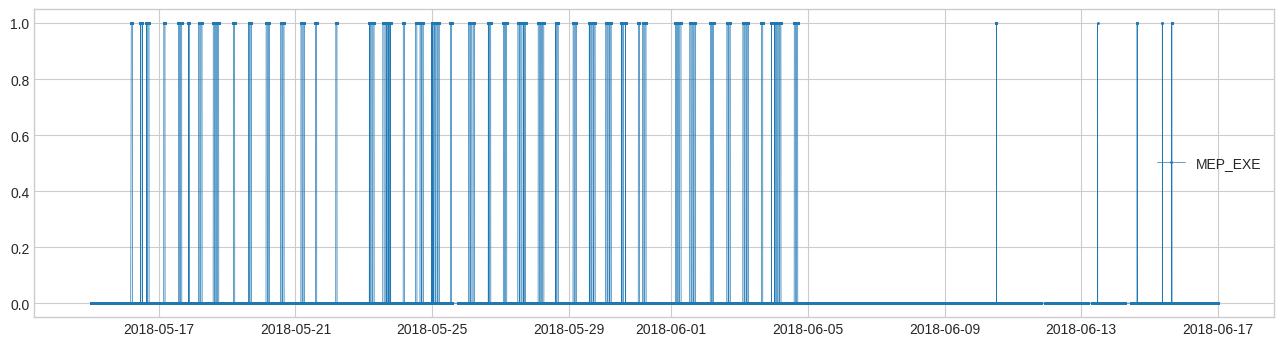

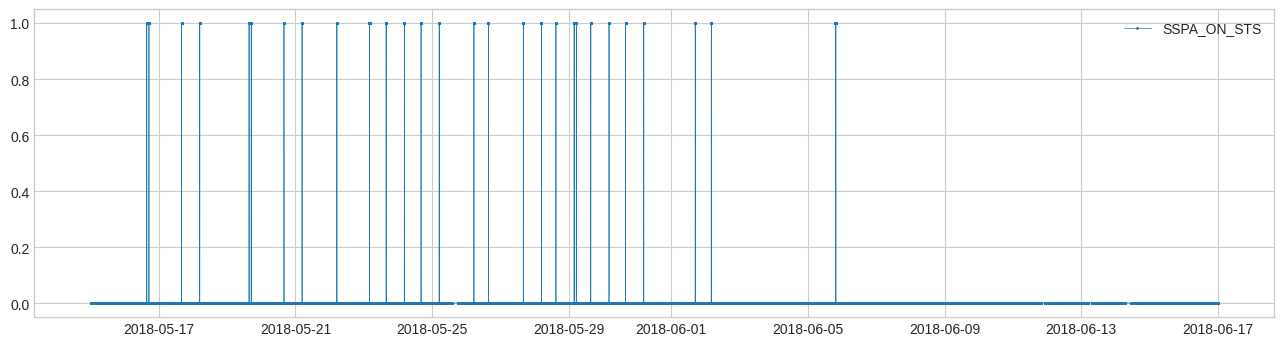

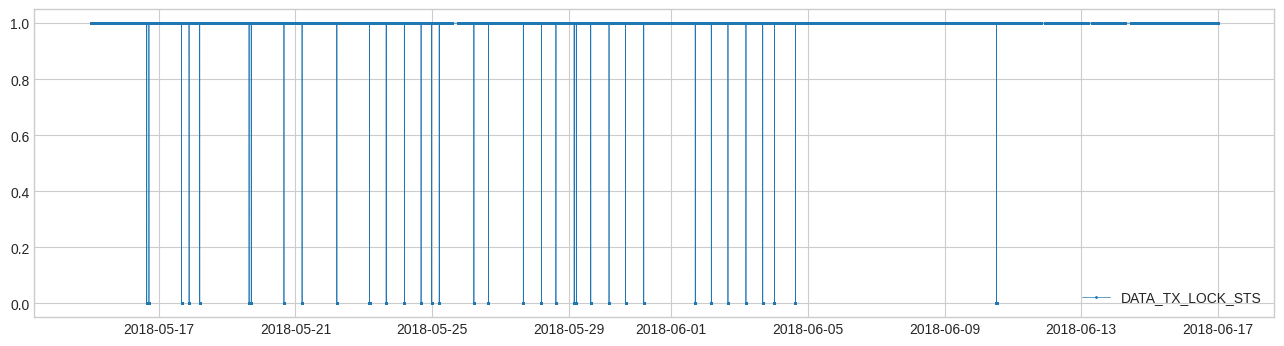

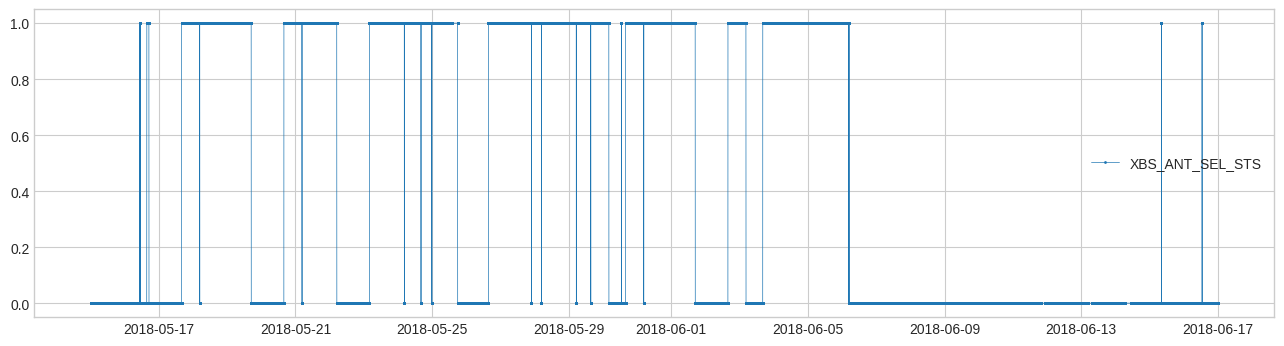

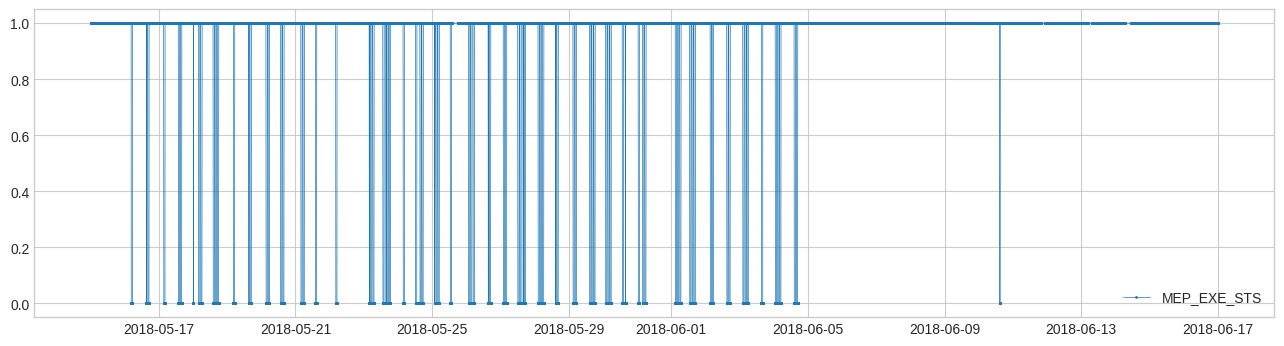

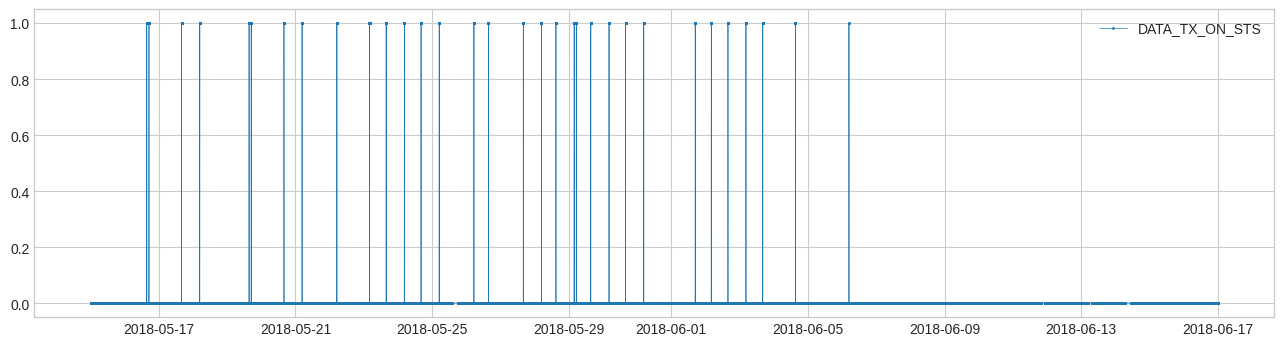

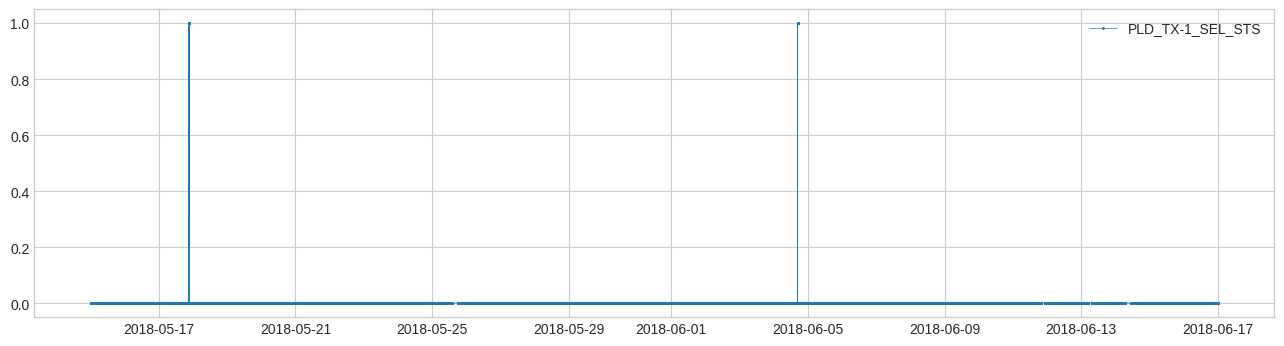

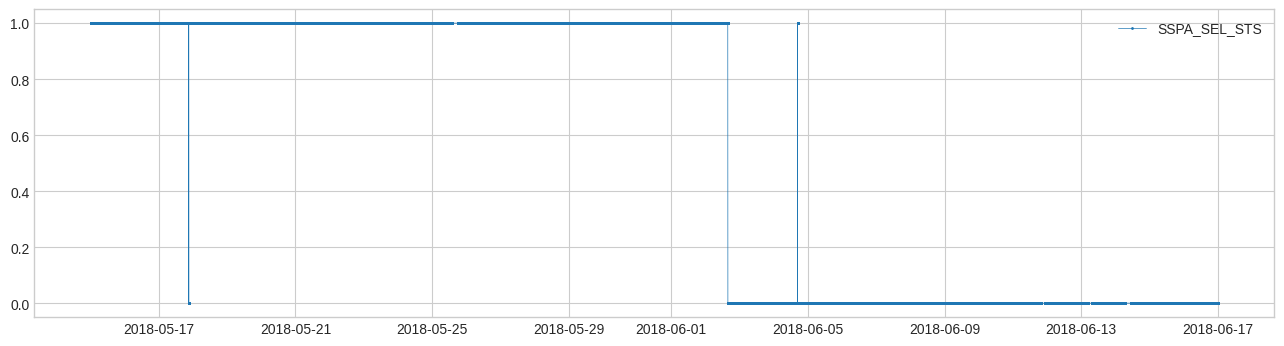

In [38]:
# Find digital values and plot them

for column in df.columns:
    if int(df[column].mode()) == 1 or int(df[column].mode()) == 0:
        if int(df[column].max()) == 1:
            if len(df.loc[df[column] == 1]) + len(df.loc[df[column] == 0]) == len(df[column]):
                print(column)
                plot(df[column])
